In [3]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

## Prepare Data

In [6]:
n_data = torch.ones(100, 2)

In [40]:
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100, 1)

x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100, 1)

x = torch.cat((x0, x1)).type(torch.FloatTensor)
y = torch.cat((y0, y1)).type(torch.FloatTensor)

## Modeling

In [44]:
# modeling
linear = nn.Linear(2, 1, bias = True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid)

# cost
cost_func = nn.BCELoss()
#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

## Train

In [45]:
epochs = 300

for step in range(epochs):
    prob = model(x)
    pred = prob.gt(0.5).data.numpy().squeeze()
    cost = cost_func(prob, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 20 == 0:
        accuracy = sum(pred == y.data.squeeze(1).numpy())/200.
        print('cost={:.4f}, Accuracy={:.2f}'.format(cost.item(), accuracy))

cost=0.5000, Accuracy=0.80
cost=0.3555, Accuracy=0.91
cost=0.2750, Accuracy=0.94
cost=0.2249, Accuracy=0.96
cost=0.1910, Accuracy=0.97
cost=0.1664, Accuracy=0.98
cost=0.1479, Accuracy=0.98
cost=0.1333, Accuracy=0.98
cost=0.1216, Accuracy=0.98
cost=0.1119, Accuracy=0.98
cost=0.1038, Accuracy=0.98
cost=0.0969, Accuracy=0.99
cost=0.0910, Accuracy=0.99
cost=0.0858, Accuracy=0.99
cost=0.0812, Accuracy=0.99


In [49]:
# Draw massgrid
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                     np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))

# here "model" is your model's prediction (classification) function
Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())

# Put the result into a color plot
Z = Z.view(xx.shape)

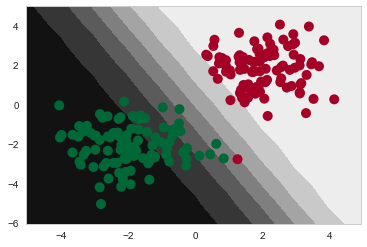

In [51]:
plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred, s=100, lw=0, cmap='RdYlGn')